# Lista 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, square, sawtooth, unit_impulse, periodogram, welch

Zadanie 1 z listy 1:

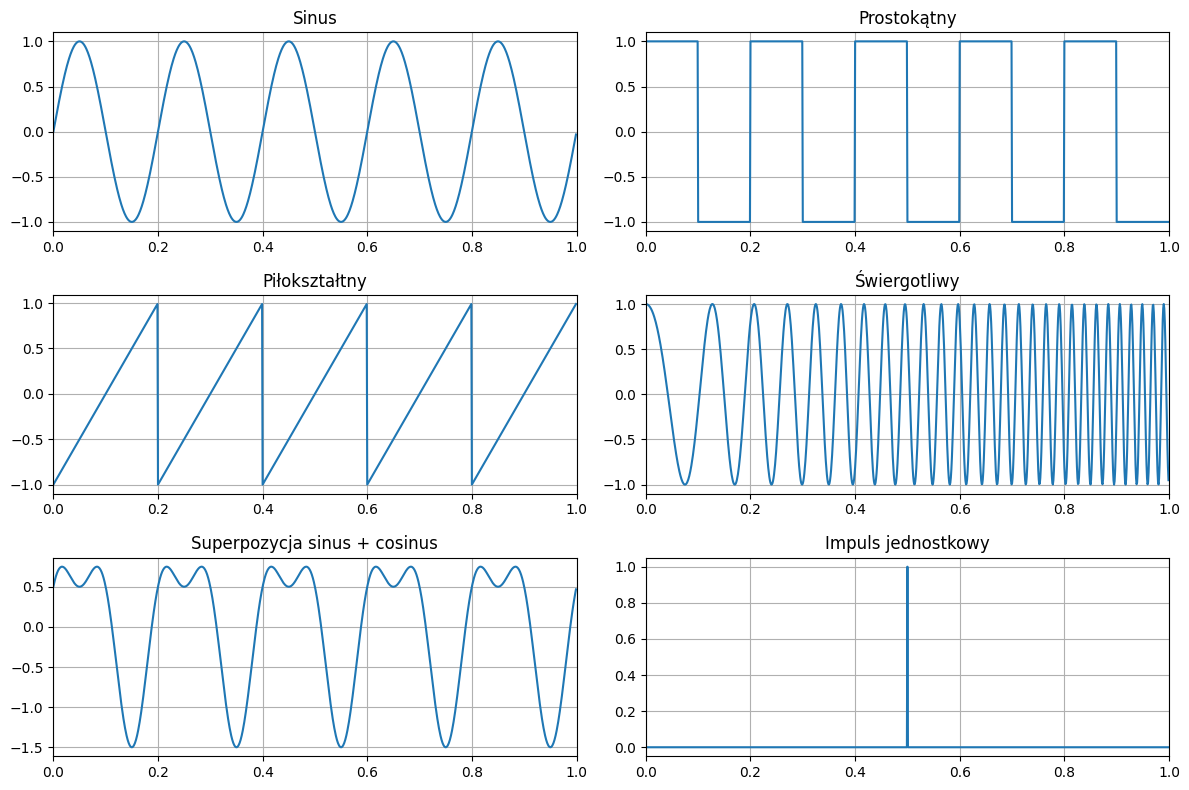

In [3]:
# Zad 1 z listy 1

# Parametry sygnału
fs = 1000  # Częstotliwość próbkowania (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Oś czasu 1 sekunda

# a) Sygnał sinusoidalny
sin_wave = np.sin(2 * np.pi * 5 * t)  # 5 Hz

# b) Sygnał prostokątny
square_wave = square(2 * np.pi * 5 * t)  # 5 Hz

# c) Sygnał piłokształtny
sawtooth_wave = sawtooth(2 * np.pi * 5 * t)  # 5 Hz

# d) Sygnał świergotliwy (chirp)
chirp_wave = chirp(t, f0=5, f1=50, t1=1, method='linear')

# e) Superpozycja sinusa i cosinusa
superposition_wave = np.sin(2 * np.pi * 5 * t) + 0.5 * np.cos(2 * np.pi * 10 * t)

# f) Impuls jednostkowy
impulse_wave = unit_impulse(fs, idx=fs//2)

# Tworzenie wykresów
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Rysowanie sygnałów
axes[0, 0].plot(t, sin_wave)
axes[0, 0].set_title("Sinus")

axes[0, 1].plot(t, square_wave)
axes[0, 1].set_title("Prostokątny")

axes[1, 0].plot(t, sawtooth_wave)
axes[1, 0].set_title("Piłokształtny")

axes[1, 1].plot(t, chirp_wave)
axes[1, 1].set_title("Świergotliwy")

axes[2, 0].plot(t, superposition_wave)
axes[2, 0].set_title("Superpozycja sinus + cosinus")

axes[2, 1].plot(t, impulse_wave)
axes[2, 1].set_title("Impuls jednostkowy")

# Ustawienia wykresów
for ax in axes.flat:
    ax.set_xlim(0, 1)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Zadanie 1
Dla sygnałów z zadania 1 z listy 1 napisz kod w języku Python, który wyznaczy dla nich widmową gęstość mocy. W tym celu wykorzystaj metody: periodogram i welcha. Metody dostępne są m.in. w bibliotece SciPy.

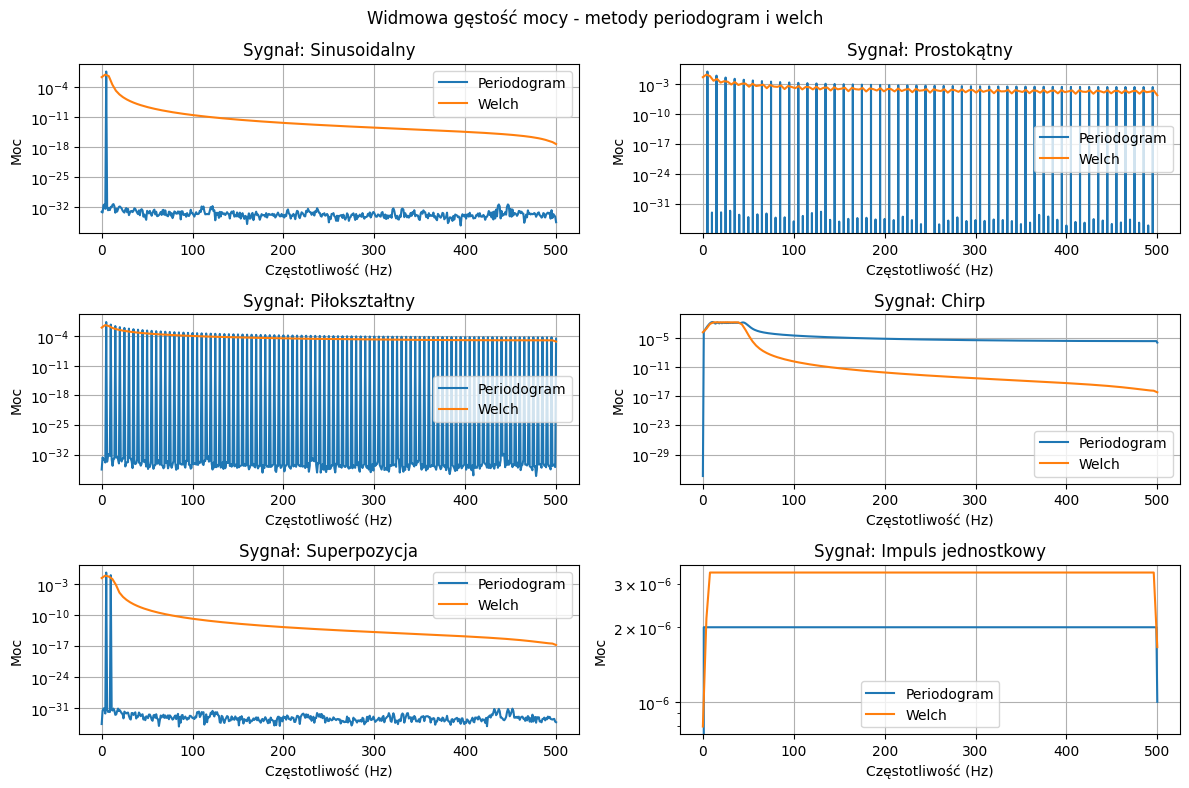

In [4]:
# Lista sygnałów do analizy
signals = {
    "Sinusoidalny": sin_wave,
    "Prostokątny": square_wave,
    "Piłokształtny": sawtooth_wave,
    "Chirp": chirp_wave,
    "Superpozycja": superposition_wave,
    "Impuls jednostkowy": impulse_wave
}

# Obliczanie i wykres WGM
plt.figure(figsize=(12, 8))
for i, (label, signal) in enumerate(signals.items(), 1):
    f_p, Pxx_p = periodogram(signal, fs)
    f_w, Pxx_w = welch(signal, fs)
    
    plt.subplot(3, 2, i)
    plt.semilogy(f_p, Pxx_p, label='Periodogram')
    plt.semilogy(f_w, Pxx_w, label='Welch')
    plt.title(f'Sygnał: {label}')
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Moc')
    plt.legend()
    plt.grid()

plt.suptitle('Widmowa gęstość mocy - metody periodogram i welch')
plt.tight_layout()
plt.show()

### Zadanie 2
Przygotuj w Pythonie kod, który wyznaczy z definicji widmową gęstość mocy. 

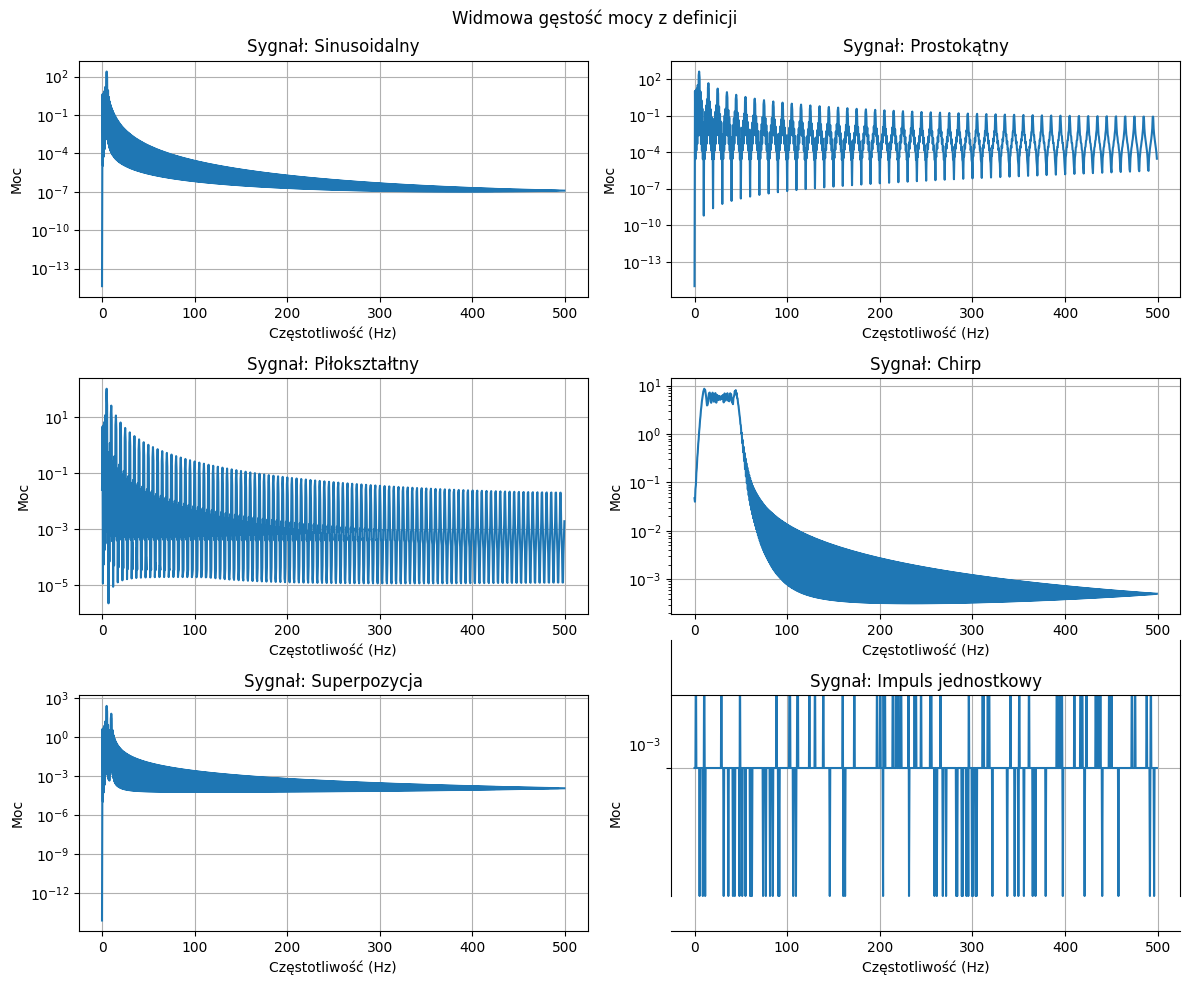

In [5]:
# Obliczanie WGM z definicji
def wgm_z_definicji(signal, fs):
    # Autokorelacja R_xx
    R_xx = np.correlate(signal, signal, mode='full') / len(signal)

    # Transformata Fouriera autokorelacji
    S_xx = np.fft.fft(R_xx)

    # Częstotliwości
    freqs = np.fft.fftfreq(len(R_xx), 1/fs)

    # Tylko dodatnie wartości
    freqs = freqs[:len(R_xx)//2]
    S_xx = np.abs(S_xx[:len(R_xx)//2])

    return freqs, S_xx


plt.figure(figsize=(12, 10))
for i, (label, signal) in enumerate(signals.items(), 1):

    freqs, S_xx = wgm_z_definicji(signal, fs)    
    
    plt.subplot(3, 2, i)
    plt.semilogy(freqs, S_xx)
    plt.title(f'Sygnał: {label}')
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Moc')
    plt.grid()

plt.suptitle('Widmowa gęstość mocy z definicji')
plt.tight_layout()
plt.show()

### Zadanie 3
Dla sygnałów z zadania 1 z listy 1 napisz kod w języku Python, który pozwoli na porównanie wyników uzyskanych dla metod bibliotecznych (periodogram i welch) z samodzielną implementacją z definicji.

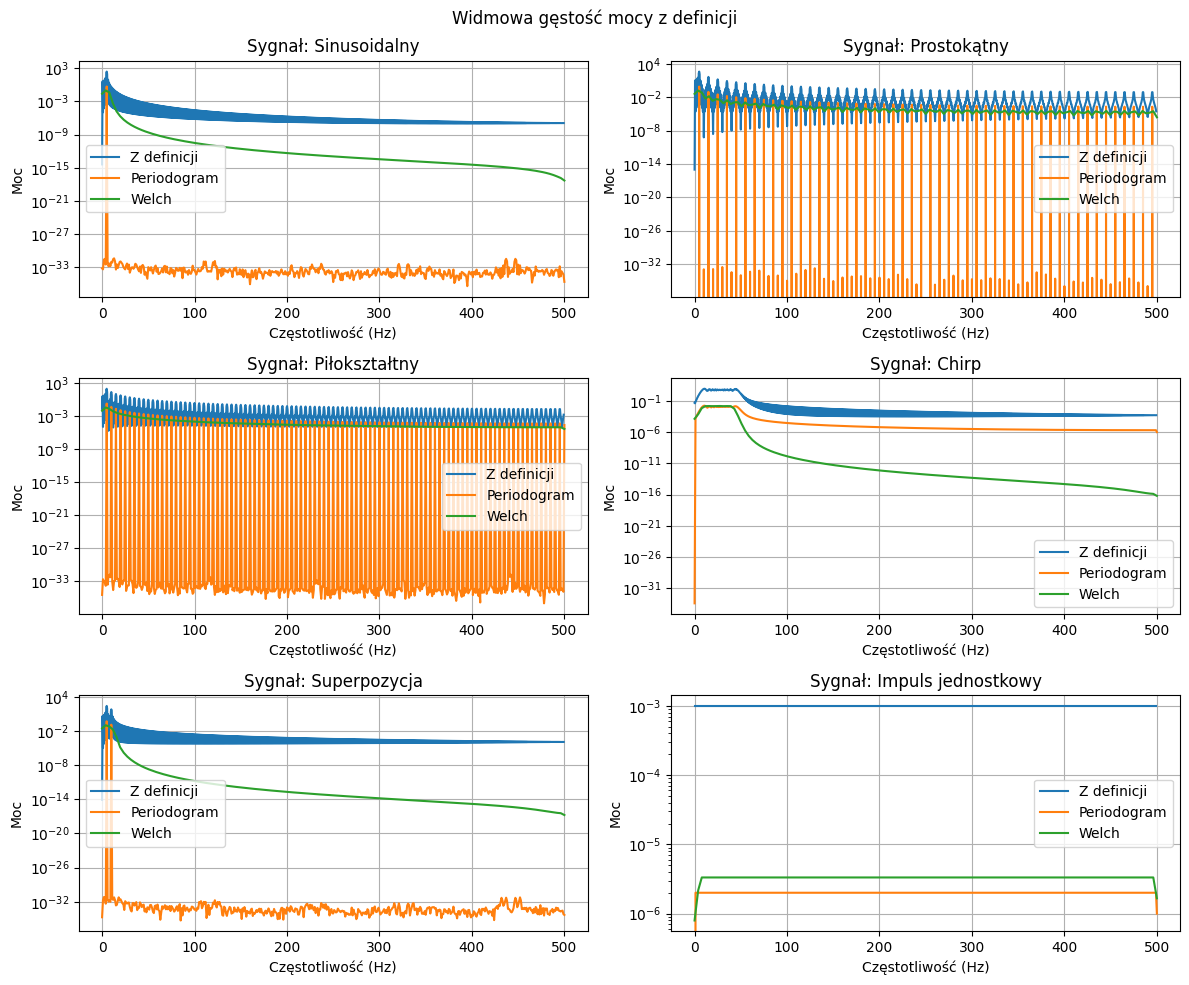

In [6]:
plt.figure(figsize=(12, 10))
for i, (label, signal) in enumerate(signals.items(), 1):

    # WGM z definicji
    freqs, S_xx = wgm_z_definicji(signal, fs)

    # Metody biblioteczne
    f_p, Pxx_p = periodogram(signal, fs)
    f_w, Pxx_w = welch(signal, fs)
    
    plt.subplot(3, 2, i)
    plt.semilogy(freqs, S_xx, label='Z definicji')
    plt.semilogy(f_p, Pxx_p, label='Periodogram')
    plt.semilogy(f_w, Pxx_w, label='Welch')
    plt.title(f'Sygnał: {label}')
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Moc')
    plt.grid()
    plt.legend()

plt.suptitle('Widmowa gęstość mocy z definicji')
plt.tight_layout()
plt.show()

#### Różnice w widmowej gęstości mocy (WGM) wynikają z różnych metod jej obliczania:

- Periodogram – Jest bezpośrednią transformatą Fouriera sygnału i daje szacowanie WGM o wysokiej rozdzielczości, ale jest bardzo podatny na wariancję. Wykres może mieć duże wahania i szumy.

- Metoda Welcha – Dzieli sygnał na segmenty, uśrednia widmo, co redukuje wariancję, ale kosztem zmniejszenia rozdzielczości. Widmo wygląda bardziej wygładzone.

- Definicyjna WGM (autokorelacja + FFT) – Opiera się na teorii: oblicza autokorelację, a następnie wykonuje jej transformatę Fouriera. Ta metoda teoretycznie powinna dawać dokładniejsze oszacowanie, ale w praktyce może być podatna na numeryczne błędy wynikające z obcinania sygnału lub niepełnej długości próbek.
